In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import fix_yahoo_finance as yf

In [2]:
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf
## NASDAQ
acronyms=["FOXA", "FOXB", "ATVI", "ADBE", "AKAM", "ALXN", "GOOGL", "GOOG", "AMZN", "AAL", "AMGN", "AAL", "AMGN", "ADI", "AAPL", "AMAT", "ADSK", "ADP", "BIDU", "BBBY", "BIIB", "BMRN", "AVGO", "CA", "CELG", "CERN", "CHTR", "CHKP", "CSCO", "CTXS", "CTSH", "CMCSA", "COST", "CSX", "CTRP", "DISCA", "DISCK", "DISH"]
for stock in acronyms:
    dataApp = yf.download(stock,'2016-01-01','2018-01-01')
    try:
        dataApp.Close.plot()
    except:
        print "Couldn't plot stock " + stock
plt.show()

[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock FOXA
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock FOXB


/home/ramela/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  
/usr/local/lib/python2.7/dist-packages/fix_yahoo_finance/__init__.py:199: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  data = data.swapaxes(0, 2)


[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock ATVI
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock ADBE
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock AKAM
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock ALXN
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock GOOGL
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock GOOG
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock AMZN
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock AAL
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock AMGN
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock AAL
[*********************100%***********************] 

In [3]:
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf
import pickle
## DOW JONES
acronyms=["MMM", "AXP", "AAPL", "BA", "CAT", "CVX", "CSCO", "KO", "DD", "XOM", "GE", "GS", "HD", "INTC", "IBM", "JNJ", "JPM", "MCD", "MRK", "MSFT", "NKE", "PFE", "PG", "TRV", "UNH", "UTX", "VZ", "V", "WMT", "DIS"]
dowJonesDataFrames = {}
for stock in acronyms:
    dataApp = yf.download(stock,'2009-01-01','2018-06-01')
    try:
        dataApp.Close.plot()
        dowJonesDataFrames[stock] = dataApp
    except:
        print "Couldn't plot stock " + stock
        
with open('dowJonesDataFrames', 'wb') as handle:
    pickle.dump(dowJonesDataFrames, handle, protocol=pickle.HIGHEST_PROTOCOL)
       
plt.show()

[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock MMM
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock AXP


/home/ramela/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  


[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock AAPL
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock BA
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock CAT
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock CVX
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock CSCO
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock KO
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock DD
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock XOM
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock GE
[*********************100%***********************]  1 of 1 downloaded
Couldn't plot stock GS
[*********************100%***********************]  1 of 1 down

In [2]:
import pickle
with open('dowJonesDataFrames', 'rb') as handle:
   dowJonesDataFrames = pickle.load(handle)

In [3]:
dowJonesDataFramesNormalized = {}
for stock in dowJonesDataFrames:
    base_value = dowJonesDataFrames[stock]['Open'][0]
    newStock = {}
    for column in dowJonesDataFrames[stock]:
        newStock[column] = dowJonesDataFrames[stock][column] / base_value
    dowJonesDataFramesNormalized[stock] = pd.DataFrame(data=newStock) 
    
with open('dowJonesDataFramesNormalized', 'wb') as handle:
    pickle.dump(dowJonesDataFramesNormalized, handle, protocol=pickle.HIGHEST_PROTOCOL)

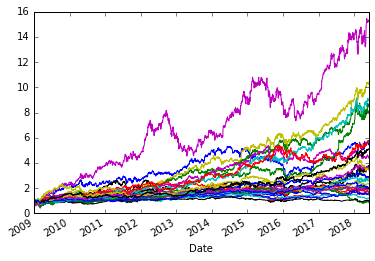

In [4]:
for stock in dowJonesDataFramesNormalized:
    dowJonesDataFramesNormalized[stock].Close.plot()
       
plt.show()

In [12]:
for stock in dowJonesDataFramesNormalized:
    dowJonesDataFramesNormalized[stock].index = map(lambda x:str(x).split(" ")[0],dowJonesDataFramesNormalized[stock].index)
    prev_key = dowJonesDataFramesNormalized[stock].index[0]
    prev_row = dowJonesDataFramesNormalized[stock].loc[prev_key]
    
    
    dowJonesDataFramesNormalized[stock]['IncrementPre'] = pd.Series(0.0, index=dowJonesDataFramesNormalized[stock].index)
    dowJonesDataFramesNormalized[stock]['IncrementDay'] = pd.Series(0.0, index=dowJonesDataFramesNormalized[stock].index)
    dowJonesDataFramesNormalized[stock]['MinDay'] = pd.Series(0.0, index=dowJonesDataFramesNormalized[stock].index)
    dowJonesDataFramesNormalized[stock]['MaxDay'] = pd.Series(0.0, index=dowJonesDataFramesNormalized[stock].index)

    dowJonesDataFramesNormalized[stock].loc[prev_key]['IncrementDay'] = (dowJonesDataFramesNormalized[stock].loc[prev_key].Close - dowJonesDataFramesNormalized[stock].loc[prev_key].Open) / dowJonesDataFramesNormalized[stock].loc[prev_key].Open
    dowJonesDataFramesNormalized[stock].loc[prev_key]['MaxDay'] = (dowJonesDataFramesNormalized[stock].loc[prev_key].High / dowJonesDataFramesNormalized[stock].loc[prev_key].Open) - 1
    dowJonesDataFramesNormalized[stock].loc[prev_key]['MinDay'] = (dowJonesDataFramesNormalized[stock].loc[prev_key].Low / dowJonesDataFramesNormalized[stock].loc[prev_key].Open) - 1
        
    for key in dowJonesDataFramesNormalized[stock].index[1:]:

        curr_row = dowJonesDataFramesNormalized[stock].loc[key]

        curr_row['IncrementDay'] = (curr_row.Close - curr_row.Open) / curr_row.Open
        curr_row['IncrementPre'] = (curr_row.Open - prev_row.Close) / prev_row.Close
        curr_row['MaxDay'] = (curr_row.High / curr_row.Open) - 1
        curr_row['MinDay'] = (curr_row.Low / curr_row.Open) - 1
        
        prev_key = key
        prev_row = curr_row
    
with open('dowJonesDataFramesNormalized', 'wb') as handle:
    pickle.dump(dowJonesDataFramesNormalized, handle, protocol=pickle.HIGHEST_PROTOCOL)

            Adj Close     Close      High       Low      Open        Volume  \
2008-12-31   0.877741  1.032276  1.043406  0.996661  1.000000  5.356483e+05   
2009-01-02   0.914648  1.075682  1.086255  1.023929  1.033389  6.096661e+05   
2009-01-05   0.943985  1.110184  1.126322  1.057318  1.068448  8.914413e+05   
2009-01-06   0.996981  1.172510  1.189761  1.113523  1.129661  7.690707e+05   
2009-01-07   0.954982  1.113523  1.153033  1.103506  1.142460  8.736728e+05   
2009-01-08   0.956414  1.115192  1.122426  1.079577  1.101836  6.819756e+05   
2009-01-09   0.917757  1.070117  1.129661  1.066778  1.121870  7.007346e+05   
2009-01-12   0.898666  1.047858  1.081247  1.032276  1.057874  6.818364e+05   
2009-01-13   0.906303  1.056761  1.079021  1.024485  1.037284  6.602560e+05   
2009-01-14   0.850941  0.992209  1.038954  0.984975  1.025598  9.482471e+05   
2009-01-15   0.826602  0.963829  1.023372  0.931553  1.011686  1.435687e+06   
2009-01-16   0.811807  0.946578  1.000557  0.908737 

            Adj Close     Close      High       Low      Open         Volume  \
2008-12-31   0.793432  1.025968  1.035105  0.997836  1.000000  130875.210387   
2009-01-02   0.841406  1.088002  1.095456  1.028613  1.029094  168554.941092   
2009-01-05   0.858514  1.110123  1.125511  1.077182  1.094013  166323.635489   
2009-01-06   0.861117  1.113489  1.130079  1.094013  1.126473  172644.866554   
2009-01-07   0.832295  1.076220  1.096658  1.062034  1.084395  158360.182736   
2009-01-08   0.832853  1.076942  1.079586  1.055061  1.069969  131690.310171   
2009-01-09   0.826531  1.068767  1.085598  1.056264  1.077182  135732.147151   
2009-01-12   0.813328  1.051695  1.068767  1.038471  1.064679  119961.529214   
2009-01-13   0.789528  1.020918  1.048810  1.005049  1.043039  152906.948786   
2009-01-14   0.766098  0.990623  1.009377  0.982688  1.006973  176842.991104   
2009-01-15   0.761636  0.984852  1.000240  0.949988  0.987497  203532.099062   
2009-01-16   0.789528  1.020918  1.03510

            Adj Close     Close      High       Low      Open         Volume  \
2008-12-31   0.714144  1.014678  1.023731  1.000000  1.000000  136684.495564   
2009-01-02   0.738763  1.049657  1.060357  1.009328  1.018244  187872.422829   
2009-01-05   0.740114  1.051578  1.075034  1.038957  1.044719  232572.010080   
2009-01-06   0.746776  1.061042  1.076132  1.047051  1.063923  218031.544087   
2009-01-07   0.714047  1.014540  1.057202  1.005898  1.048148  175641.970490   
2009-01-08   0.716750  1.018381  1.026612  1.004390  1.009739  156340.187755   
2009-01-09   0.703041  0.998903  1.015089  0.990398  1.013443  194548.691508   
2009-01-12   0.683732  0.971468  0.996022  0.966255  0.990809  194725.646235   
2009-01-13   0.693386  0.985185  0.997256  0.968176  0.968176  197240.049458   
2009-01-14   0.672822  0.955967  0.976406  0.944170  0.971331  207714.671942   
2009-01-15   0.683249  0.970782  0.977366  0.936214  0.956104  264651.570243   
2009-01-16   0.692614  0.984088  1.00054

            Adj Close     Close      High       Low      Open        Volume  \
2008-12-31   0.669503  1.002214  1.007306  0.997565  1.000000  6.885278e+05   
2009-01-02   0.678820  1.016161  1.018375  0.997122  1.005092  7.241887e+05   
2009-01-05   0.672017  1.005977  1.015940  1.000221  1.008855  8.960461e+05   
2009-01-06   0.661222  0.989816  1.017711  0.984282  1.011733  9.434492e+05   
2009-01-07   0.664475  0.994687  1.000221  0.978968  0.978968  9.555458e+05   
2009-01-08   0.669060  1.001550  1.002435  0.986496  0.992694  8.893957e+05   
2009-01-09   0.659595  0.987381  1.001992  0.979633  1.001328  8.767944e+05   
2009-01-12   0.646728  0.968120  0.988931  0.963250  0.984282  9.063450e+05   
2009-01-13   0.651017  0.974541  0.981182  0.965685  0.969670  1.000770e+06   
2009-01-14   0.630312  0.943547  0.963693  0.935798  0.963029  1.197857e+06   
2009-01-15   0.641256  0.959929  0.960593  0.938676  0.942440  1.242488e+06   
2009-01-16   0.648355  0.970556  0.984724  0.962364 

            Adj Close      Close       High        Low       Open  \
2008-12-31   0.669493   0.992788   1.020589   0.992672   1.000000   
2009-01-02   0.711851   1.055601   1.058974   0.990578   0.998953   
2009-01-05   0.741894   1.100151   1.118762   1.078400   1.083750   
2009-01-06   0.729657   1.082005   1.130278   1.074677   1.116087   
2009-01-07   0.713890   1.058625   1.075957   1.049901   1.067931   
2009-01-08   0.727147   1.078283   1.083518   1.047342   1.051879   
2009-01-09   0.710517   1.053623   1.086193   1.048505   1.084215   
2009-01-12   0.695457   1.031290   1.058392   1.018379   1.052228   
2009-01-13   0.688005   1.020240   1.043853   1.004420   1.026405   
2009-01-14   0.669336   0.992556   1.014889   0.985460   1.003141   
2009-01-15   0.654040   0.969873   0.978481   0.931139   0.937187   
2009-01-16   0.645804   0.957660   0.981505   0.935210   0.980575   
2009-01-20   0.613408   0.909620   0.953821   0.909620   0.953007   
2009-01-21   0.649726   0.963476  

            Adj Close      Close       High        Low       Open  \
2008-12-31   0.839706   1.036356   1.042679   0.999802   1.000000   
2009-01-02   0.855556   1.055918   1.061253   1.032207   1.045643   
2009-01-05   0.861639   1.063426   1.092669   1.047224   1.047224   
2009-01-06   0.922316   1.138313   1.145623   1.076862   1.076862   
2009-01-07   0.902304   1.113614   1.145031   1.106303   1.120134   
2009-01-08   0.892698   1.101759   1.112428   1.052559   1.106698   
2009-01-09   0.890457   1.098992   1.112626   1.082395   1.106896   
2009-01-12   0.847871   1.046434   1.109465   1.038530   1.092472   
2009-01-13   0.850753   1.049990   1.053942   1.017783   1.042284   
2009-01-14   0.816012   1.007113   1.039518   0.992294   1.027663   
2009-01-15   0.790557   0.975697   1.004742   0.938550   0.995455   
2009-01-16   0.759018   0.936771   0.977080   0.893302   0.968781   
2009-01-20   0.679129   0.838174   0.917012   0.831061   0.909899   
2009-01-21   0.707306   0.872950  

            Adj Close     Close      High       Low      Open        Volume  \
2008-12-31   0.759954  1.022197  1.032037  1.000000  1.000000  1.436476e+05   
2009-01-02   0.798062  1.073455  1.075057  1.023112  1.027689  1.628650e+05   
2009-01-05   0.783942  1.054462  1.078261  1.048284  1.073227  2.539748e+05   
2009-01-06   0.779178  1.048055  1.070938  1.039130  1.070709  2.485904e+05   
2009-01-07   0.742941  0.999313  1.043478  0.988558  1.034783  2.065561e+05   
2009-01-08   0.748895  1.007323  1.009382  0.972998  0.982380  2.147414e+05   
2009-01-09   0.734945  0.988558  1.008238  0.966819  1.004805  2.030275e+05   
2009-01-12   0.700750  0.942563  0.986270  0.929748  0.983982  2.193066e+05   
2009-01-13   0.704323  0.947368  0.958581  0.927918  0.940732  2.123936e+05   
2009-01-14   0.669447  0.900458  0.923112  0.875286  0.915332  3.950046e+05   
2009-01-15   0.677357  0.901373  0.914874  0.853318  0.896110  3.535080e+05   
2009-01-16   0.680108  0.905034  0.928833  0.870938 

            Adj Close     Close      High       Low      Open         Volume  \
2008-12-31   0.801843  1.008467  1.017498  0.997930  1.000000   87121.351378   
2009-01-02   0.822038  1.033866  1.039323  0.997742  1.005832   88246.468928   
2009-01-05   0.812314  1.021637  1.034431  1.012229  1.022013  102771.397826   
2009-01-06   0.820991  1.032549  1.044403  1.017874  1.027281   97079.958718   
2009-01-07   0.800646  1.006961  1.014299  0.994167  1.009407  109206.016587   
2009-01-08   0.800496  1.006773  1.011477  0.992850  1.000376  112366.881943   
2009-01-09   0.788379  0.991533  1.015992  0.988711  1.013170   83236.121045   
2009-01-12   0.783293  0.985136  0.999436  0.978363  0.990969   85149.573466   
2009-01-13   0.759955  0.955785  0.989087  0.946378  0.979868  131405.451311   
2009-01-14   0.748436  0.941298  0.950141  0.926623  0.938852  111446.844348   
2009-01-15   0.743350  0.934901  0.950329  0.906491  0.941298  119742.234441   
2009-01-16   0.764443  0.961430  0.96895

            Adj Close     Close      High       Low      Open        Volume  \
2008-12-31   0.784985  0.994814  1.028522  0.992653  1.000000  6.544296e+05   
2009-01-02   0.822836  1.042783  1.045376  0.992221  0.996975  6.440147e+05   
2009-01-05   0.842614  1.067848  1.075194  1.028954  1.038029  9.754063e+05   
2009-01-06   0.861369  1.091616  1.101556  1.063959  1.077787  9.877529e+05   
2009-01-07   0.837840  1.061798  1.087295  1.055748  1.074762  8.581375e+05   
2009-01-08   0.831702  1.054019  1.057044  1.024201  1.042351  7.484789e+05   
2009-01-09   0.813629  1.031115  1.057908  1.017286  1.057908  7.315212e+05   
2009-01-12   0.783279  0.992653  1.035436  0.977528  1.030683  1.018159e+06   
2009-01-13   0.767593  0.972774  0.998271  0.961539  0.992221  8.833319e+05   
2009-01-14   0.747133  0.946845  0.961971  0.936906  0.957217  8.872602e+05   
2009-01-15   0.777824  0.985739  1.007347  0.936042  0.947277  1.123570e+06   
2009-01-16   0.791123  1.002593  1.010372  0.975367 

            Adj Close     Close      High       Low      Open        Volume  \
2008-12-31   0.890152  1.005317  1.016837  0.997785  1.000000  3.992955e+05   
2009-01-02   0.938407  1.059814  1.064688  0.996899  1.008418  4.340541e+05   
2009-01-05   0.921930  1.041205  1.063358  1.031901  1.041648  5.172840e+05   
2009-01-06   0.953707  1.077093  1.100133  1.054497  1.054940  5.348161e+05   
2009-01-07   0.909376  1.027027  1.058485  1.015507  1.058485  5.450022e+05   
2009-01-08   0.898391  1.014621  1.028799  0.997342  1.023482  5.582942e+05   
2009-01-09   0.875245  0.988480  1.024369  0.984936  1.024369  5.090696e+05   
2009-01-12   0.857591  0.968542  0.996012  0.957466  0.988037  4.988835e+05   
2009-01-13   0.831698  0.939300  0.971644  0.931768  0.953478  6.868498e+05   
2009-01-14   0.816006  0.921577  0.939300  0.904741  0.927337  6.859814e+05   
2009-01-15   0.837975  0.946389  0.957466  0.883917  0.921577  8.050377e+05   
2009-01-16   0.841898  0.950820  0.980948  0.920691 

            Adj Close     Close      High       Low      Open         Volume  \
2008-12-31   0.776339  1.007904  1.017964  1.000000  1.000000   79852.694611   
2009-01-02   0.805951  1.046347  1.048982  1.004671  1.004671   90517.365269   
2009-01-05   0.800877  1.039760  1.049940  1.032096  1.034970   99589.221557   
2009-01-06   0.823108  1.068623  1.082755  1.034371  1.043234  115562.874251   
2009-01-07   0.809825  1.051377  1.063473  1.043353  1.051856  101258.682635   
2009-01-08   0.804198  1.044072  1.055569  1.029701  1.051617   86608.383234   
2009-01-09   0.781321  1.014371  1.047904  1.008982  1.042515   89105.389222   
2009-01-12   0.790638  1.026467  1.037126  1.011018  1.012814   96679.041916   
2009-01-13   0.787225  1.022036  1.037006  1.015449  1.023952   91702.994012   
2009-01-14   0.767392  0.996287  1.015808  0.983353  1.008383  113413.173653   
2009-01-15   0.775971  1.007425  1.015928  0.985150  1.001317  140536.526946   
2009-01-16   0.783350  1.017006  1.02682

            Adj Close     Close      High       Low      Open         Volume  \
2008-12-31   0.746252  1.007661  1.013855  0.995436  1.000000  176769.361916   
2009-01-02   0.758082  1.023635  1.026406  0.995273  1.005542  181511.008362   
2009-01-05   0.752650  1.016300  1.017767  1.003912  1.015811  233460.480308   
2009-01-06   0.750477  1.013366  1.026080  1.002608  1.018745  218444.994896   
2009-01-07   0.737319  0.995599  1.005053  0.988427  0.999674  202373.274731   
2009-01-08   0.729231  0.984678  0.998370  0.977995  0.992828  187581.098210   
2009-01-09   0.722592  0.975713  0.991035  0.973920  0.988427  176743.282045   
2009-01-12   0.723558  0.977017  0.984841  0.972942  0.973920  185382.239132   
2009-01-13   0.717884  0.969356  0.982722  0.962021  0.977343  257406.691358   
2009-01-14   0.698449  0.943113  0.964629  0.932681  0.962510  262560.725756   
2009-01-15   0.693621  0.936593  0.936919  0.921760  0.930562  306555.837215   
2009-01-16   0.696880  0.940994  0.94947

            Adj Close     Close      High       Low      Open         Volume  \
2008-12-31   0.907143  1.026143  1.047544  0.986381  1.000000  181105.305961   
2009-01-02   0.932619  1.054961  1.065418  0.999392  1.021644  171309.585878   
2009-01-05   0.954333  1.079523  1.105910  1.039154  1.043410  194512.407454   
2009-01-06   0.953581  1.078672  1.121109  1.066634  1.094966  262059.831276   
2009-01-07   0.908326  1.027481  1.068215  1.017145  1.056785  151574.663219   
2009-01-08   0.918108  1.038546  1.052043  1.005350  1.015564  163522.620708   
2009-01-09   0.902091  1.020428  1.056299  0.977748  1.044626  148259.974423   
2009-01-12   0.834907  0.944431  1.018483  0.929353  1.013619  191836.094159   
2009-01-13   0.837594  0.947471  0.959144  0.896279  0.901751  314458.908426   
2009-01-14   0.813623  0.920355  0.934825  0.893118  0.922665  222965.715539   
2009-01-15   0.793629  0.897738  0.926556  0.839008  0.912330  313660.027083   
2009-01-16   0.785245  0.888254  0.93020

            Adj Close     Close      High       Low      Open        Volume  \
2008-12-31   0.734128  0.996601  1.014276  0.989803  1.000000  2.315690e+06   
2009-01-02   0.761170  1.033311  1.036710  0.983685  0.998640  3.549164e+06   
2009-01-05   0.746647  1.013596  1.039429  1.006798  1.024473  3.896696e+06   
2009-01-06   0.769683  1.044867  1.054385  1.025153  1.025833  4.189762e+06   
2009-01-07   0.723111  0.981645  1.023793  0.974847  1.005438  8.931965e+06   
2009-01-08   0.728620  0.989123  0.990483  0.968729  0.982325  4.289708e+06   
2009-01-09   0.708589  0.961931  0.992522  0.953093  0.991842  3.096608e+06   
2009-01-12   0.690561  0.937458  0.972128  0.925901  0.962610  3.676581e+06   
2009-01-13   0.684552  0.929300  0.963970  0.914344  0.923861  4.457179e+06   
2009-01-14   0.655006  0.889191  0.926581  0.881713  0.915024  4.728049e+06   
2009-01-15   0.665523  0.903467  0.914344  0.864038  0.884432  4.973073e+06   
2009-01-16   0.688057  0.934058  0.949014  0.902107 

            Adj Close     Close      High       Low      Open        Volume  \
2008-12-31   0.799206  1.014293  1.019179  0.990954  1.000000  2.511652e+05   
2009-01-02   0.815173  1.034558  1.040528  1.009227  1.012846  2.904795e+05   
2009-01-05   0.805764  1.022616  1.037633  1.007418  1.030577  2.898733e+05   
2009-01-06   0.798636  1.013570  1.027682  1.005971  1.024245  3.464085e+05   
2009-01-07   0.791793  1.004885  1.017007  0.996200  1.003980  3.036367e+05   
2009-01-08   0.732487  0.929618  0.937579  0.910259  0.928352  1.679732e+06   
2009-01-09   0.735338  0.933237  0.948254  0.927266  0.933237  5.192202e+05   
2009-01-12   0.732629  0.929799  0.944274  0.925638  0.931789  3.335517e+05   
2009-01-13   0.743037  0.943007  0.953501  0.932875  0.933418  4.522055e+05   
2009-01-14   0.735053  0.932875  0.940836  0.927085  0.927809  3.704903e+05   
2009-01-15   0.732059  0.929075  0.937941  0.910621  0.932875  5.077022e+05   
2009-01-16   0.735053  0.932875  0.941741  0.922924 

            Adj Close     Close      High       Low      Open        Volume  \
2008-12-31   0.725200  1.024020  1.032870  0.996839  1.000000  3.811530e+06   
2009-01-02   0.764146  1.079014  1.079014  1.028445  1.043616  3.610120e+06   
2009-01-05   0.744449  1.051201  1.089760  1.042984  1.085335  4.584501e+06   
2009-01-06   0.754745  1.065740  1.073325  1.040455  1.065740  4.499842e+06   
2009-01-07   0.721171  1.018331  1.055626  1.012010  1.053729  4.475834e+06   
2009-01-08   0.722514  1.020227  1.024020  0.993679  1.014538  3.927908e+06   
2009-01-09   0.716247  1.011378  1.036030  1.000632  1.024652  3.359880e+06   
2009-01-12   0.708637  1.000632  1.024020  0.991150  1.009482  4.131890e+06   
2009-01-13   0.668796  0.944374  0.991783  0.930468  0.989254  8.160645e+06   
2009-01-14   0.631640  0.891909  0.925411  0.886220  0.922250  6.368559e+06   
2009-01-15   0.616420  0.870417  0.893805  0.837547  0.890013  8.878913e+06   
2009-01-16   0.624925  0.882427  0.906448  0.825537 

            Adj Close     Close      High       Low      Open         Volume  \
2008-12-31   0.713800  1.023569  1.029293  0.999663  1.000000  404855.205224   
2009-01-02   0.727889  1.043771  1.047811  1.020539  1.025589  411023.555184   
2009-01-05   0.716853  1.027946  1.065993  1.019865  1.058923  503989.882021   
2009-01-06   0.703704  1.009091  1.052525  0.994949  1.046465  506100.993061   
2009-01-07   0.692433  0.992929  1.006061  0.981818  0.996970  428121.197706   
2009-01-08   0.689381  0.988552  0.999663  0.977778  0.999327  356366.991368   
2009-01-09   0.674588  0.967340  0.996970  0.957912  0.973064  357454.533419   
2009-01-12   0.669188  0.959596  0.974747  0.952862  0.967340  299212.111138   
2009-01-13   0.667779  0.957576  0.976094  0.950505  0.956566  364013.455757   
2009-01-14   0.653221  0.936700  0.951515  0.922559  0.940404  412168.336291   
2009-01-15   0.660265  0.946801  0.952189  0.921549  0.936364  426845.103473   
2009-01-16   0.661909  0.949158  0.96835

            Adj Close     Close      High       Low      Open         Volume  \
2008-12-31   0.860632  0.983001  1.009239  0.968219  1.000000  206378.425956   
2009-01-02   0.892663  1.019586  1.024390  0.980784  0.986696  180558.025889   
2009-01-05   0.878104  1.002956  1.022543  0.981523  1.012565  314815.237059   
2009-01-06   0.857397  0.979305  1.011456  0.953806  1.001848  274316.344210   
2009-01-07   0.850926  0.971914  1.000739  0.962306  0.987066  304079.833854   
2009-01-08   0.864191  0.987066  0.994457  0.951589  0.964523  225679.978776   
2009-01-09   0.855779  0.977458  0.997783  0.953437  0.988544  219194.390953   
2009-01-12   0.828925  0.946785  0.990022  0.934590  0.982262  230694.760927   
2009-01-13   0.820513  0.937177  0.971545  0.918330  0.920917  384102.009760   
2009-01-14   0.779099  0.889874  0.922395  0.878418  0.912786  289974.142275   
2009-01-15   0.805306  0.919808  0.929047  0.881744  0.889135  396714.722717   
2009-01-16   0.825042  0.942350  0.94678

            Adj Close     Close      High       Low      Open        Volume  \
2008-12-31   0.694640  1.003399  1.018130  0.995467  1.000000  1.840431e+06   
2009-01-02   0.716605  1.035127  1.036827  1.002833  1.013031  1.627365e+06   
2009-01-05   0.712290  1.028895  1.047025  1.013031  1.042493  2.388805e+06   
2009-01-06   0.698170  1.008499  1.044759  1.003399  1.037960  2.901904e+06   
2009-01-07   0.686011  0.990935  1.009632  0.985836  1.001700  2.224725e+06   
2009-01-08   0.692286  1.000000  1.002266  0.981870  0.985836  1.884720e+06   
2009-01-09   0.684049  0.988102  1.009632  0.983003  1.003966  2.044408e+06   
2009-01-12   0.680912  0.983569  1.002266  0.975637  1.001133  1.918448e+06   
2009-01-13   0.689933  0.996601  0.997734  0.979037  0.985836  2.456725e+06   
2009-01-14   0.676205  0.976771  0.988102  0.963173  0.979603  2.581960e+06   
2009-01-15   0.682089  0.985269  0.985269  0.935977  0.975637  4.574754e+06   
2009-01-16   0.686403  0.991501  1.006799  0.972805 

            Adj Close     Close      High       Low      Open        Volume  \
2008-12-31   0.632695  1.021700  1.034961  0.995479  1.000000  5.600794e+05   
2009-01-02   0.646506  1.044002  1.047619  1.011151  1.028330  4.771627e+05   
2009-01-05   0.606193  0.978903  1.015672  0.959614  1.015672  1.159945e+06   
2009-01-06   0.596488  0.963231  0.987040  0.948764  0.984931  8.998187e+05   
2009-01-07   0.604647  0.961423  0.978300  0.950874  0.959011  7.303443e+05   
2009-01-08   0.613935  0.976190  0.980410  0.955696  0.960217  5.598288e+05   
2009-01-09   0.609575  0.969259  0.983725  0.964738  0.979506  5.978118e+05   
2009-01-12   0.602562  0.958107  0.977697  0.951175  0.971067  7.683016e+05   
2009-01-13   0.597065  0.949367  0.959614  0.925859  0.958409  6.609208e+05   
2009-01-14   0.579248  0.921037  0.942435  0.913803  0.938517  6.531282e+05   
2009-01-15   0.566738  0.901145  0.912598  0.861362  0.908981  1.030828e+06   
2009-01-16   0.567875  0.902954  0.922242  0.885172 

            Adj Close     Close      High       Low      Open         Volume  \
2008-12-31   0.764660  1.017980  1.027671  0.998342  1.000000  382892.129122   
2009-01-02   0.781997  1.041061  1.047054  1.006121  1.020913  456563.388334   
2009-01-05   0.781902  1.040933  1.051007  1.028819  1.036343  552666.425725   
2009-01-06   0.769162  1.023974  1.054961  1.015430  1.047437  534380.273766   
2009-01-07   0.749526  0.997832  1.022571  0.989033  1.010584  449742.424120   
2009-01-08   0.757572  1.008544  1.014665  0.993369  0.993497  392975.016398   
2009-01-09   0.743012  0.989161  1.010584  0.986738  1.005866  419051.273120   
2009-01-12   0.733146  0.976027  0.988523  0.969268  0.976027  485999.757358   
2009-01-13   0.746365  0.993624  0.998980  0.975006  0.975006  600822.509585   
2009-01-14   0.719353  0.957664  0.985845  0.947717  0.982402  612605.218378   
2009-01-15   0.734296  0.977557  0.978067  0.943764  0.952563  708520.803584   
2009-01-16   0.748089  0.995919  1.00038

            Adj Close     Close      High       Low      Open         Volume  \
2008-12-31   0.792873  1.006906  1.014703  0.986411  1.000000   78500.781432   
2009-01-02   0.792873  1.006906  1.022722  0.983070  1.008242   73060.816954   
2009-01-05   0.781120  0.991980  1.002673  0.964580  0.997104  115201.606487   
2009-01-06   0.757264  0.961684  0.987302  0.951660  0.961461  114473.159155   
2009-01-07   0.727268  0.923591  0.960570  0.918022  0.946090  115595.903667   
2009-01-08   0.740775  0.940744  0.949655  0.912675  0.928937   89389.621060   
2009-01-09   0.736389  0.935175  0.951660  0.926041  0.942303   79723.770990   
2009-01-12   0.719725  0.914012  0.949877  0.904433  0.932056   88313.657570   
2009-01-13   0.733057  0.930942  0.937848  0.897082  0.903319   97520.608098   
2009-01-14   0.701657  0.891067  0.924928  0.884161  0.910002  115825.353438   
2009-01-15   0.701306  0.890622  0.906661  0.852974  0.892626  144027.626287   
2009-01-16   0.720076  0.914458  0.92982

            Adj Close     Close      High       Low      Open        Volume  \
2008-12-31   0.823484  1.027036  1.040391  0.991531  1.000000  8.433778e+05   
2009-01-02   0.828772  1.021173  1.030619  0.992508  1.015961  1.058466e+06   
2009-01-05   0.773256  0.952769  1.002280  0.947231  1.000977  1.435485e+06   
2009-01-06   0.789911  0.973290  0.990879  0.961238  0.970358  1.440270e+06   
2009-01-07   0.742590  0.914984  0.957655  0.912052  0.949511  1.373176e+06   
2009-01-08   0.719591  0.886645  0.910423  0.874919  0.908795  1.696280e+06   
2009-01-09   0.686546  0.845928  0.897394  0.840717  0.897394  1.387541e+06   
2009-01-12   0.658523  0.811401  0.851792  0.798046  0.844300  1.933550e+06   
2009-01-13   0.696591  0.858306  0.866124  0.790554  0.821173  2.391622e+06   
2009-01-14   0.684959  0.843974  0.856026  0.806515  0.833550  2.407404e+06   
2009-01-15   0.643455  0.792834  0.881107  0.773941  0.864495  4.454700e+06   
2009-01-16   0.603272  0.743322  0.814332  0.668730 

            Adj Close     Close      High       Low      Open        Volume  \
2008-12-31   0.709136  1.023891  1.034933  0.994579  1.000000  1.211773e+06   
2009-01-02   0.737780  1.065248  1.076089  1.010038  1.022887  9.659747e+05   
2009-01-05   0.743064  1.072877  1.079502  1.049990  1.056414  1.036997e+06   
2009-01-06   0.728047  1.051195  1.084120  1.039952  1.080104  1.227898e+06   
2009-01-07   0.701628  1.013050  1.043967  1.009837  1.036137  1.619305e+06   
2009-01-08   0.714559  1.031721  1.031921  0.998193  1.009637  1.263200e+06   
2009-01-09   0.689809  0.995985  1.039550  0.991166  1.032925  1.063754e+06   
2009-01-12   0.696900  1.006224  1.013250  0.982935  0.991769  1.102622e+06   
2009-01-13   0.688280  0.993776  1.022887  0.985947  1.000000  1.251090e+06   
2009-01-14   0.648652  0.936559  0.972897  0.926922  0.968079  2.200683e+06   
2009-01-15   0.652962  0.942783  0.951014  0.917888  0.936559  1.319703e+06   
2009-01-16   0.650737  0.939570  0.951616  0.920899 

            Adj Close     Close      High       Low      Open         Volume  \
2008-12-31   0.743436  1.008923  1.012167  0.994809  1.000000  101078.846546   
2009-01-02   0.762085  1.034231  1.040396  1.009085  1.012005  140374.758929   
2009-01-05   0.759814  1.031149  1.035691  1.020279  1.026282  124803.700922   
2009-01-06   0.742839  1.008112  1.045750  1.003082  1.038125  176114.538873   
2009-01-07   0.732080  0.993511  1.015088  0.987021  1.004705  128332.253867   
2009-01-08   0.723473  0.981830  0.986859  0.968527  0.986859  152211.228946   
2009-01-09   0.718093  0.974530  0.988806  0.970960  0.984912  116007.464569   
2009-01-12   0.719169  0.975990  0.993348  0.969338  0.975016  140864.700533   
2009-01-13   0.709127  0.962362  0.986372  0.954251  0.978423  147349.126336   
2009-01-14   0.685339  0.930078  0.951006  0.915153  0.949221  248867.622467   
2009-01-15   0.693109  0.940623  0.950519  0.917424  0.927969  197376.706641   
2009-01-16   0.713312  0.968040  0.97306

            Adj Close     Close      High       Low      Open        Volume  \
2008-12-31   0.819584  1.007417  1.022868  0.996292  1.000000  2.318523e+06   
2009-01-02   0.852769  1.048208  1.050680  1.004326  1.014215  2.532794e+06   
2009-01-05   0.860312  1.057478  1.069221  1.035229  1.041409  2.810890e+06   
2009-01-06   0.894503  1.099506  1.111248  1.066749  1.071075  3.600532e+06   
2009-01-07   0.870871  1.070457  1.086527  1.057478  1.073548  3.105476e+06   
2009-01-08   0.881932  1.084054  1.085909  1.050680  1.064895  2.872967e+06   
2009-01-09   0.839696  1.032139  1.066749  1.026576  1.065513  4.210068e+06   
2009-01-12   0.824612  1.013597  1.037083  0.990729  1.030902  3.394790e+06   
2009-01-13   0.827126  1.016687  1.022250  0.995674  1.006799  3.209753e+06   
2009-01-14   0.791426  0.972806  1.002472  0.964153  0.995056  3.097145e+06   
2009-01-15   0.794946  0.977132  0.985785  0.938813  0.965389  3.820426e+06   
2009-01-16   0.795449  0.977750  1.009271  0.957973 

            Adj Close     Close      High       Low      Open         Volume  \
2008-12-31   0.786656  1.005417  1.012057  0.990390  1.000000   69994.757994   
2009-01-02   0.809213  1.034248  1.037742  1.005067  1.005591   92851.651232   
2009-01-05   0.799780  1.022191  1.032500  1.015377  1.027258   65853.573301   
2009-01-06   0.809213  1.034248  1.045081  1.024113  1.026385   86776.166346   
2009-01-07   0.793901  1.014678  1.030229  1.006116  1.024113   80344.225057   
2009-01-08   0.800874  1.023589  1.025861  1.003844  1.007863   68930.630788   
2009-01-09   0.789390  1.008911  1.031103  1.005941  1.027433   63969.945833   
2009-01-12   0.780367  0.997379  1.011707  0.990564  1.007164   73082.299493   
2009-01-13   0.769019  0.982876  1.001223  0.973440  0.993360   77408.701730   
2009-01-14   0.752477  0.961733  0.978508  0.952298  0.966451   78993.534859   
2009-01-15   0.754254  0.964005  0.974314  0.948628  0.962432   83477.197274   
2009-01-16   0.771344  0.985847  0.98951

            Adj Close     Close      High       Low      Open        Volume  \
2008-12-31   0.792120  1.006732  1.019161  0.997929  1.000000  2.403884e+06   
2009-01-02   0.828384  1.052822  1.056447  1.003107  1.011393  2.593682e+06   
2009-01-05   0.836126  1.062662  1.070430  1.038840  1.046090  3.183594e+06   
2009-01-06   0.845906  1.075091  1.087519  1.067323  1.074573  3.007944e+06   
2009-01-07   0.794972  1.010357  1.050751  1.008804  1.045572  3.765402e+06   
2009-01-08   0.819828  1.041947  1.045572  1.012429  1.016572  3.638291e+06   
2009-01-09   0.795379  1.010875  1.051269  1.005179  1.044537  2.579767e+06   
2009-01-12   0.793342  1.008286  1.024858  0.999482  1.020715  2.701372e+06   
2009-01-13   0.807603  1.026411  1.035215  1.010875  1.010875  3.409814e+06   
2009-01-14   0.777858  0.988607  1.019161  0.984464  1.011393  4.156266e+06   
2009-01-15   0.783970  0.996375  0.999482  0.959089  0.987571  4.980311e+06   
2009-01-16   0.803121  1.020715  1.031072  0.991714 

            Adj Close     Close      High       Low      Open         Volume  \
2008-12-31   0.753812  1.010983  1.014701  0.998141  1.000000  201427.847246   
2009-01-02   0.764144  1.024840  1.030754  0.997634  1.016053  196669.482933   
2009-01-05   0.756584  1.014701  1.026867  1.003042  1.020953  262588.712403   
2009-01-06   0.752048  1.008618  1.021291  0.995269  1.019432  373396.417709   
2009-01-07   0.744993  0.999155  1.010814  0.992734  1.001014  241522.473809   
2009-01-08   0.743607  0.997296  1.011997  0.990706  1.008111  293095.640419   
2009-01-09   0.743985  0.997803  1.006252  0.989354  0.999324  248366.002028   
2009-01-12   0.735040  0.985806  1.003886  0.982596  0.998310  257740.790808   
2009-01-13   0.741339  0.994255  0.998986  0.986482  0.990199  262139.236228   
2009-01-14   0.730126  0.979216  0.990030  0.969584  0.989354  282323.420074   
2009-01-15   0.725968  0.973640  0.983440  0.946435  0.981582  344433.930382   
2009-01-16   0.723700  0.970598  0.98124

In [3]:
import pickle
with open('dowJonesDataFramesNormalized', 'rb') as handle:
   dowJonesDataFramesNormalized = pickle.load(handle)

In [20]:
#Amount of prev values
window = 30

In [21]:
stockList = dowJonesDataFramesNormalized.keys()
print "The stock list has " + str(len(stockList)) + " different stocks"
indexList = dowJonesDataFramesNormalized[stockList[0]].index
#print indexList[window:]
predIndex = indexList[window + 1:]

baseDataFrame = pd.DataFrame(data={})
for stock in stockList:
    print "Treating stock: " + str(stock)
    for currentBeggining in xrange(0, window):
        colNameIncDay = "incDayPrev" + str(window - currentBeggining) + stock
        baseDataFrame[colNameIncDay] = pd.Series(0.0, index=predIndex)

        colNameIncPre = "incPrePrev" + str(window - currentBeggining) + stock
        baseDataFrame[colNameIncPre] = pd.Series(0.0, index=predIndex)

        colNameMax = "maxPrev" + str(window - currentBeggining) + stock
        baseDataFrame[colNameMax] = pd.Series(0.0, index=predIndex)

        colNameMin = "minPrev" + str(window - currentBeggining) + stock
        baseDataFrame[colNameMin] = pd.Series(0.0, index=predIndex)
        
        colNameVol = "volume" + str(window - currentBeggining) + stock
        baseDataFrame[colNameVol] = pd.Series(0.0, index=predIndex)
        
        for i in xrange(0,len(indexList) - window - 1):
            predDay = indexList[i + window + 1]
            prevDay = indexList[i + window - window - 1 + currentBeggining]
            baseDataFrame.loc[predDay][colNameIncDay] = 100 * dowJonesDataFramesNormalized[stock].loc[prevDay]["IncrementDay"]
            baseDataFrame.loc[predDay][colNameIncPre] = 100 * dowJonesDataFramesNormalized[stock].loc[prevDay]["IncrementPre"]
            baseDataFrame.loc[predDay][colNameMax] = 100 * dowJonesDataFramesNormalized[stock].loc[prevDay]["MaxDay"]
            baseDataFrame.loc[predDay][colNameMin] = 100 * dowJonesDataFramesNormalized[stock].loc[prevDay]["MinDay"]
            baseDataFrame.loc[predDay][colNameVol] = dowJonesDataFramesNormalized[stock].loc[prevDay]["Volume"]

import pickle
with open('baseDataFrame' + str(window), 'wb') as handle:
    pickle.dump(baseDataFrame, handle, protocol=pickle.HIGHEST_PROTOCOL)

The stock list has 29 different stocks
Treating stock: AXP
Treating stock: BA
Treating stock: CVX
Treating stock: CSCO
Treating stock: AAPL
Treating stock: V
Treating stock: CAT
Treating stock: VZ
Treating stock: HD
Treating stock: IBM
Treating stock: PG
Treating stock: DIS
Treating stock: GS
Treating stock: INTC
Treating stock: WMT
Treating stock: GE
Treating stock: MRK
Treating stock: UNH
Treating stock: JPM
Treating stock: UTX
Treating stock: XOM
Treating stock: TRV
Treating stock: PFE
Treating stock: NKE
Treating stock: MCD
Treating stock: KO
Treating stock: MMM
Treating stock: MSFT
Treating stock: JNJ


In [ ]:
import pickle
stockList = dowJonesDataFramesNormalized.keys()

with open('baseDataFrame' + str(window), 'rb') as handle:
   baseDataFrame = pickle.load(handle)

for currentStock in stockList:
    currentDataFrame = baseDataFrame.copy()
    print "Current stock is " + str(currentStock)
    currentDataFrame["IncrementPre"] = pd.Series(0.0, index=predIndex)
    currentDataFrame["IncrementDay"] = pd.Series(0.0, index=predIndex)
    currentDataFrame["MinDay"] = pd.Series(0.0, index=predIndex)
    currentDataFrame["MaxDay"] = pd.Series(0.0, index=predIndex)
    
    for predDay in predIndex:
        currentDataFrame.loc[predDay]["IncrementPre"] = 100 * dowJonesDataFramesNormalized[currentStock].loc[predDay]["IncrementPre"]
        currentDataFrame.loc[predDay]["IncrementDay"] = 100 * dowJonesDataFramesNormalized[currentStock].loc[predDay]["IncrementDay"]
        currentDataFrame.loc[predDay]["MinDay"] = 100 * dowJonesDataFramesNormalized[currentStock].loc[predDay]["MinDay"]
        currentDataFrame.loc[predDay]["MaxDay"] = 100 * dowJonesDataFramesNormalized[currentStock].loc[predDay]["MaxDay"]
    
    incDayCat = map(lambda x:int(round(x)), currentDataFrame["IncrementDay"])
    currentDataFrame["IncrementDayCategorical"] = pd.Series(incDayCat, index=predIndex)
    incPreCat = map(lambda x:int(round(x)), currentDataFrame["IncrementPre"])
    currentDataFrame["IncrementPreCategorical"] = pd.Series(incPreCat, index=predIndex)
        
    fileName = currentStock + "_" + str(window) + ".csv"
    currentDataFrame.to_csv(fileName, sep=";", encoding='utf-8')

Current stock is AXP
Current stock is BA
Current stock is CVX
Current stock is CSCO
Current stock is AAPL
Current stock is V
Current stock is CAT
Current stock is VZ
Current stock is HD
Current stock is IBM
Current stock is PG
Current stock is DIS
Current stock is GS
Current stock is INTC
Current stock is WMT
Current stock is GE
Current stock is MRK
Current stock is UNH
Current stock is JPM
Current stock is UTX
Current stock is XOM
Current stock is TRV
Current stock is PFE
Current stock is NKE
Current stock is MCD
Current stock is KO
Current stock is MMM


In [8]:
import pickle

window = 7
stockList = dowJonesDataFramesNormalized.keys()
print "The stock list has " + str(len(stockList)) + " different stocks"
indexList = dowJonesDataFramesNormalized[stockList[0]].index
#print indexList[window:]
predIndex = indexList[window + 1:]

with open('baseDataFrame' + str(window), 'rb') as handle:
   currentDataFrame = pickle.load(handle)

for currentStock in stockList:
    print "Current stock is " + str(currentStock)
    
    IncrementPre = []
    IncrementDay = []
    MinDay = []
    MaxDay = []
    for predDay in predIndex:
        IncrementPre.append(100 * dowJonesDataFramesNormalized[currentStock].loc[predDay]["IncrementPre"])
        IncrementDay.append(100 * dowJonesDataFramesNormalized[currentStock].loc[predDay]["IncrementDay"])
        MinDay.append(100 * dowJonesDataFramesNormalized[currentStock].loc[predDay]["MinDay"])
        MaxDay.append(100 * dowJonesDataFramesNormalized[currentStock].loc[predDay]["MaxDay"])

    currentDataFrame["IncrementPre" + currentStock] = pd.Series(IncrementPre, index=predIndex)
    currentDataFrame["IncrementDay" + currentStock] = pd.Series(IncrementDay, index=predIndex)
    currentDataFrame["MinDay" + currentStock] = pd.Series(MinDay, index=predIndex)
    currentDataFrame["MaxDay" + currentStock] = pd.Series(MaxDay, index=predIndex)
        
    incDayCat = map(lambda x:int(round(x)), currentDataFrame["IncrementDay" + currentStock])
    currentDataFrame["IncrementDayCategorical" + currentStock] = pd.Series(incDayCat, index=predIndex)
    incPreCat = map(lambda x:int(round(x)), currentDataFrame["IncrementPre" + currentStock])
    currentDataFrame["IncrementPreCategorical" + currentStock] = pd.Series(incPreCat, index=predIndex)
        
fileName = "all_stocks_" + str(window) + ".csv"
currentDataFrame.to_csv(fileName, sep=";", encoding='utf-8')

import pickle
with open("all_stocks_" + str(window), 'wb') as handle:
    pickle.dump(currentDataFrame, handle, protocol=pickle.HIGHEST_PROTOCOL)

The stock list has 29 different stocks
Current stock is AXP
Current stock is BA
Current stock is CVX
Current stock is CSCO
Current stock is AAPL
Current stock is V
Current stock is CAT
Current stock is VZ
Current stock is HD
Current stock is IBM
Current stock is PG
Current stock is DIS
Current stock is GS
Current stock is INTC
Current stock is WMT
Current stock is GE
Current stock is MRK
Current stock is UNH
Current stock is JPM
Current stock is UTX
Current stock is XOM
Current stock is TRV
Current stock is PFE
Current stock is NKE
Current stock is MCD
Current stock is KO
Current stock is MMM
Current stock is MSFT
Current stock is JNJ


In [15]:
import pickle
with open("all_stocks_" + str(window), 'rb') as handle:
   currentDataFrame = pickle.load(handle)